# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Renan Rodriguez de Mesquita Cabral </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
#dados_filt.loc[(dados_geral.UF=="São Paulo") | (dados_geral.UF=="Rio de Janeiro"),"Região"]="Sudeste"

df.loc[(df.Latitude>0), "Hemisfério"]="Norte"
df.loc[(df.Latitude<0), "Hemisfério"]="Sul"


In [6]:
#df.Hemisfério

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [7]:
x=df.Magnitude
x.describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

In [8]:
import math
import numpy as np
n_de_classes=20

In [9]:
#amplitude=máx-mín
amplitude_dados=9.1-5.5
#número de classes = sqrt(n) se forem poucas amostras

amplitude_classes=amplitude_dados/n_de_classes
print(amplitude_classes)

faixa = np.arange(5.5, 9.1, amplitude_classes)

0.18


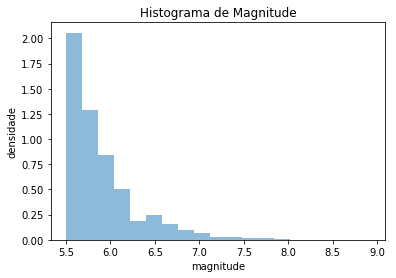

In [10]:
plot=df.Magnitude.plot.hist(bins=faixa, title="Histograma de Magnitude", normed=True, alpha=0.5)

plt.ylabel("densidade")
plt.xlabel("magnitude")

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [11]:
import scipy.stats

lamb=5.88    #média retirada do describe (mean)
mu=1/lamb    
sigma=1/lamb  #desv. pad.

loc=0
scale=mu   #média
n=23400  #aproximadamente o mesmo número do count do describe
x=expon.rvs(loc, scale, n)

In [12]:
#Validando os valores da saída:
print('Valores teóricos vs Valores simulados:')
print('média: ', mu, ' vs ', x.mean())
print('dp: ', sigma, ' vs ', x.std())

Valores teóricos vs Valores simulados:
média:  0.17006802721088435  vs  0.168762059445
dp:  0.17006802721088435  vs  0.165739429218


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

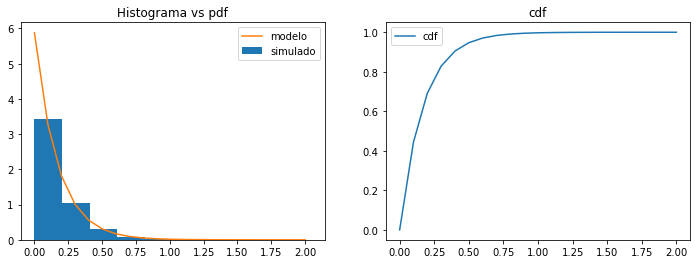

In [13]:
#fazendo o fit nos gráficos

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].hist(x, normed=True)  
w=np.arange(x.min(), x.max(), 0.1)

ax[0].plot(w, expon.pdf(w, loc, scale)) 
ax[0].set_title("Histograma vs pdf")
ax[0].legend(["modelo", "simulado"])

ax[1].plot(w, expon.cdf(w, loc, scale)) #cumulative distribution function
ax[1].set_title('cdf')
ax[1].legend(['cdf'])

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [14]:
tab_cruz=pd.crosstab(df.Type, df.Hemisfério, margins=True, normalize=True)*100
tab_cruz=tab_cruz.round(decimals=2)
tab_cruz

Hemisfério,Norte,Sul,All
Type,,,
Earthquake,44.71,54.52,99.23
Explosion,0.01,0.01,0.02
Nuclear Explosion,0.63,0.12,0.75
Rock Burst,0.00,0.00,0.00
All,45.35,54.65,100.00


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [15]:
#prob de ocorrer um terremoto e ser no hemisfério norte
#é igual a probabilidade de ser um terremoto no norte 
#dividido pela probabilidade de um terremoto acontecer


p=0.447140/(0.447140+0.545171)

print("A probabilidade de acontecer um terremoto no hemisfério Norte é: ")
print(p*100, "%")

A probabilidade de acontecer um terremoto no hemisfério Norte é: 
45.06046995347225 %


Explique o seu raciocínio

In [16]:
#explicado na célula acima

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [17]:
#probabilidade de ser nuclear explosion e ser no Norte
#dividido pela probabilidade de ser no Norte
p=0.006279/0.447
print(p)
print(p*100,"%")

0.014046979865771811
1.4046979865771811 %


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [18]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status',
       'Hemisfério'],
      dtype='object')

In [19]:
df["Magnitude_Error"]=df["Magnitude Error"]

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

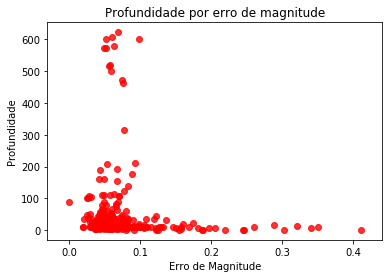

In [20]:
tab_cruz2=pd.crosstab(df["Magnitude Error"], df.Depth)

plt.scatter(df["Magnitude Error"], df.Depth, c="red", alpha=0.8)
plt.title("Profundidade por erro de magnitude")
plt.ylabel("Profundidade")
plt.xlabel("Erro de Magnitude")
plt.show()

In [21]:
#parece que quanto maior a profundidade, menor é o erro
#de magnitude

In [22]:
df["Magnitude Error"].describe()

count    327.000000
mean       0.071820
std        0.051466
min        0.000000
25%        0.046000
50%        0.059000
75%        0.075500
max        0.410000
Name: Magnitude Error, dtype: float64

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [24]:
# correlação = covariancia/desv.pad.(x)*desv.pad.(y)

df.corr(method="pearson", min_periods=1)

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Magnitude_Error
Latitude,1.000000,0.203546,-0.081020,0.007080,0.433815,0.034987,0.113208,0.315075,0.050794,-0.396768,0.015625,-0.214762,0.113208
Longitude,0.203546,1.000000,-0.085861,0.020552,0.015924,0.038579,-0.214609,0.148510,-0.233097,-0.131313,-0.093827,-0.028061,-0.214609
Depth,-0.081020,-0.085861,1.000000,-0.074609,0.174663,0.023457,-0.076918,-0.015254,-0.171162,-0.073832,-0.016467,-0.134002,-0.076918
Depth Error,0.007080,0.020552,-0.074609,1.000000,-0.320579,-0.135880,0.618254,-0.093292,0.357704,-0.077423,0.644593,0.094398,0.618254
Depth Seismic Stations,0.433815,0.015924,0.174663,-0.320579,1.000000,0.440582,-0.385993,0.813374,-0.420556,0.056619,-0.214959,-0.158620,-0.385993
Magnitude,0.034987,0.038579,0.023457,-0.135880,0.440582,1.000000,0.135573,-0.003972,-0.233579,-0.092609,-0.078406,0.075865,0.135573
Magnitude Error,0.113208,-0.214609,-0.076918,0.618254,-0.385993,0.135573,1.000000,-0.334062,0.567411,-0.076744,0.617721,0.032616,1.000000
Magnitude Seismic Stations,0.315075,0.148510,-0.015254,-0.093292,0.813374,-0.003972,-0.334062,1.000000,-0.334864,-0.117606,-0.093143,-0.167473,-0.334062
Azimuthal Gap,0.050794,-0.233097,-0.171162,0.357704,-0.420556,-0.233579,0.567411,-0.334864,1.000000,-0.033482,0.396450,-0.056217,0.567411
Horizontal Distance,-0.396768,-0.131313,-0.073832,-0.077423,0.056619,-0.092609,-0.076744,-0.117606,-0.033482,1.000000,0.126877,0.035778,-0.076744


In [26]:
print("retirado da tabela:")
print("A correlação é de -0.076918")
print("correlação negtiva de 7%")

#O valor quer dizer que há uma correlação negativa de 7% entre Magnitude Error e Depth,
#ou seja, a cada 1 Magnitude Error que aumenta, a Depth cai em 0.07

#neste caso a correlação é tão próxima de 0 que pode ser considerada inexistente

retirado da tabela:
A correlação é de -0.076918
correlação negtiva de 7%


Explique o que significa o valor da correlação calculada acima? 

a correlação é o coeficiente de o quanto os pontos estão alinhados (associação linear entre duas variáveis quantitativas)

se positivo relação linear positiva
se negativo relação linear negativa

quanto mais próximo de 1 ou -1 mais intensa é a relação de linearidade

quanto mais próximo de zero mais ausente a relação de linearidade

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [27]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [28]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

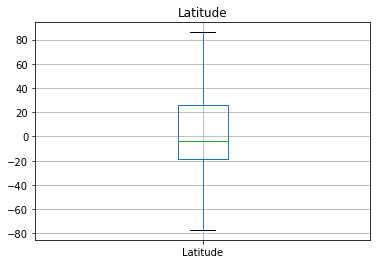

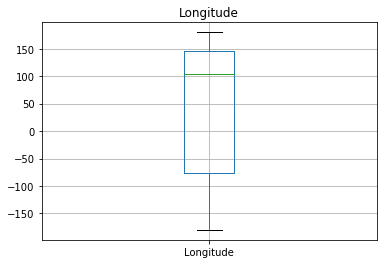

In [29]:
plot_lat=df.Latitude.plot(kind="box", title="Latitude")
plt.grid(True)
plt.show()
plot_lon=df.Longitude.plot(kind="box", title="Longitude")
#plt.title("Boxplot de Latitude e Longitude")
plt.grid(True)
plt.show()

há alta dispersão de longitude na faixa abaixo de 50%, com uma mediana alta.
valores máximo e mínimo altos

latitude tem uma mediana abaixo de 0 com baixa dispersão geral
valores máximo e mínimo baixos
a maior parte das latitudes está dispersa em uma faixa -18 à 26

logo devido a baixa variação da latitude imagina-se que está não afete a probabilidade de tremores
já a longitude talvez afete dada a sua grande variedade



## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [30]:
df["Magnitude Type"].describe()

count     23409
unique       10
top          MW
freq       7722
Name: Magnitude Type, dtype: object

In [31]:
tab_cruz

Hemisfério,Norte,Sul,All
Type,,,
Earthquake,44.71,54.52,99.23
Explosion,0.01,0.01,0.02
Nuclear Explosion,0.63,0.12,0.75
Rock Burst,0.00,0.00,0.00
All,45.35,54.65,100.00


In [36]:
df.rename(columns={"Magnitude Type":"MagType"},inplace=True)

cross=pd.crosstab(df.MagType, df.Hemisfério, margins=True, rownames=['MagTypes'], colnames=['Hemisférios'], normalize="index")*100
cross=zt.round(decimals=2)
cross

Hemisférios,Norte,Sul
MagTypes,,
MB,44.8,55.2
MD,100.0,0.0
MH,100.0,0.0
ML,100.0,0.0
MS,45.0,55.0
MW,47.7,52.3
MWB,45.2,54.8
MWC,42.1,57.9
MWR,46.2,53.8


In [37]:
PN=0.84*0.448  #prob de ser norte
PS=0.16*0.552  #prob de ser sul

In [38]:
print(PN)
print(PS)

0.37632
0.08832000000000001


Provavelmente a situação descrita ocorreu no Norte